In [1]:
import sqlite3
import ECGHeaderDTO as header
import ECGDataItemDTO as di
import LabelInfo as li

try:
   
    # Connect to DB and create a cursor
    sqliteConnection = sqlite3.connect('ecgxml.db')
    cursor = sqliteConnection.cursor()
    print('DB Init')
 
    # Write a query and execute it with cursor
    #query = 'select sqlite_version();'
    query = 'SELECT Id, Fullpath, HeaderInfo, LeadsInfo, LabelList, CreateUser, CreateDate, UpdateUser, UpdateDate, Status FROM Labels;'
    cursor.execute(query)
 
    # Fetch and output result
    result = cursor.fetchmany(5)        # .fetchall()
    # print('SQLite Version is {}'.format(result))
 
    for row in result:
        (Id, Fullpath, HeaderInfo, LeadsInfo, LabelList, CreateUser, CreateDate, UpdateUser, UpdateDate, Status) = row
        print(Id)
        print(Fullpath)

        print(HeaderInfo)
        ecg_header = header.deserialize_from_json(HeaderInfo)      # json.loads(json_data)
        print(ecg_header)

        print(LeadsInfo)
        ecg_di = di.deserialize_from_json(LeadsInfo)
        print(ecg_di)

        print(CreateUser, CreateDate, UpdateUser, UpdateDate, Status)

        print(LabelList)
        if (LabelList != 'NA'):
            labels = li.deserialize_from_json(LabelList)
            for label in labels:
                print(label)


    # Close the cursor
    cursor.close()
 
# Handle errors
except sqlite3.Error as error:
    print('Error occurred - ', error)
 
# Close DB Connection irrespective of success
# or failure
finally:
   
    if sqliteConnection:
        sqliteConnection.close()
        print('SQLite Connection closed')

DB Init
1
D:\apps\ECG\ECGs\1\1.xml
{"ClassCode":"OBS","XsiType":"GLIST_PQ","Code":"TIME_RELATIVE","CodeSystem":"2.16.840.1.113883.6.24","CodeSystemName":"MDC","HeadValue":"0","HeadUnit":"s","IncrementValue":"2","IncrementUnit":"s"}
ECGHeaderDTO: [ClassCode: OBS, XsiType: GLIST_PQ, Code: TIME_RELATIVE, CodeSystem: 2.16.840.1.113883.6.24, CodeSystemName: MDC, HeadValue: 0 s, IncrementValue: 2 s]
{"ClassCode":"OBS","XsiType":"SLIST_PQ","Code":"MDC_ECG_LEAD_II","CodeSystem":"2.16.840.1.113883.6.24","CodeSystemName":"MDC","OriginValue":"0","OriginUnit":"uV","ScaleValue":"4.88","ScaleUnit":"uV"}
ECGDataItemDTO: [ClassCode: OBS, XsiType: SLIST_PQ, Code: MDC_ECG_LEAD_II, CodeSystem: 2.16.840.1.113883.6.24, CodeSystemName: MDC, OriginValue: 0 uV, ScaleValue: 4.88 uV]
SYSTEM 2025-02-28 15:47:12.0452216 SYSTEM 2025-02-28 15:47:12.0452695 0
[{"LabelType":"P0","Lead":"II","StartX":53,"EndX":113,"Author":"SYSTEM","CreateDate":"2025-02-28T15:47:29.8173487-05:00"},{"LabelType":"P0","Lead":"II","StartX

In [2]:

import ECGHeaderDTO as header

# Serialize to JSON
ecg_header = header.ECGHeaderDTO()
ecg_header.code = "12345"
ecg_header.code_system = "ISO/IEEE 11073"
ecg_header.code_system_name = "Health Informatics"
ecg_header.xsi_type="OBS"
ecg_header.head_unit="vM"
ecg_header.class_code="CODE"
ecg_header.head_value=0.0
ecg_header.increment_unit="mv"
ecg_header.increment_value=4.88

# Convert object to dictionary, then serialize to JSON
# ecg_dict = ecg_header.to_dict()
ecg_str = header.serialize_to_json(ecg_header)     # json.dumps(ecg_dict, indent=4)
print("Serialized JSON:")
print(ecg_str)

# Deserialize from JSON
# json_data = '{"class_code": "ECG", "xsi_type": "Waveform", "code": "12345", "code_system": "ISO/IEEE 11073", "code_system_name": "Health Informatics", "head_value": 0.0, "head_unit": "mV", "increment_value": 1.0, "increment_unit": "ms"}'
json_data='{"ClassCode":"OBS","XsiType":"GLIST_PQ","Code":"TIME_RELATIVE","CodeSystem":"2.16.840.1.113883.6.24","CodeSystemName":"MDC","HeadValue":"0","HeadUnit":"s","IncrementValue":"2","IncrementUnit":"s"}'
ecg_header_des = header.deserialize_from_json(json_data)      # json.loads(json_data)
# ecg_header_deserialized = header.ECGHeaderDTO.from_dict(data)
print("\nDeserialized Object:")
print(ecg_header_des)

Serialized JSON:
{
    "class_code": "CODE",
    "xsi_type": "OBS",
    "code": "12345",
    "code_system": "ISO/IEEE 11073",
    "code_system_name": "Health Informatics",
    "head_value": 0.0,
    "head_unit": "vM",
    "increment_value": 4.88,
    "increment_unit": "mv"
}

Deserialized Object:
ECGHeaderDTO: [ClassCode: OBS, XsiType: GLIST_PQ, Code: TIME_RELATIVE, CodeSystem: 2.16.840.1.113883.6.24, CodeSystemName: MDC, HeadValue: 0 s, IncrementValue: 2 s]


In [20]:
import ECGDataItemDTO as di


# Create an instance of ECGDataItemDTO
ecg_data_item = di.ECGDataItemDTO()
ecg_data_item.code = "67890"
ecg_data_item.code_system = "ISO/IEEE 11073"
ecg_data_item.code_system_name = "Health Informatics"
ecg_data_item.origin_value = "1.0"
ecg_data_item.origin_unit = "mV"
ecg_data_item.scale_value = "0.5"
ecg_data_item.scale_unit = "mV"

# Serialize to JSON
json_str = di.serialize_to_json(ecg_data_item)
print("Serialized JSON:")
print(json_str)

# Deserialize from JSON
json_data = '{"ClassCode":"OBS","XsiType":"SLIST_PQ","Code":"MDC_ECG_LEAD_II","CodeSystem":"2.16.840.1.113883.6.24","CodeSystemName":"MDC","OriginValue":"0","OriginUnit":"uV","ScaleValue":"4.88","ScaleUnit":"uV"}'
deserialized_obj = di.deserialize_from_json(json_data)
print("\nDeserialized Object:")
print(deserialized_obj)

Serialized JSON:
{
    "class_code": "ECG",
    "xsi_type": "Waveform",
    "code": "67890",
    "code_system": "ISO/IEEE 11073",
    "code_system_name": "Health Informatics",
    "origin_value": "1.0",
    "origin_unit": "mV",
    "scale_value": "0.5",
    "scale_unit": "mV"
}

Deserialized Object:
ECGDataItemDTO: [ClassCode: OBS, XsiType: SLIST_PQ, Code: MDC_ECG_LEAD_II, CodeSystem: 2.16.840.1.113883.6.24, CodeSystemName: MDC, OriginValue: 0 uV, ScaleValue: 4.88 uV]


In [1]:
import LabelInfo as li
from datetime import datetime
from typing import List

# Example usage
if __name__ == "__main__":
    # Create a LabelInfo object
    label1 = li.LabelInfo()
    label1.label_type = "QRS"
    label1.lead = "I"
    label1.start_x = 10
    label1.start_y = 20
    label1.end_x = 30
    label1.end_y = 40
    label1.author = "Dr. Smith"
    label1.create_date = datetime(2023, 10, 1, 12, 0, 0)

    # Create another LabelInfo object
    label2 = li.LabelInfo()
    label2.label_type = "T-Wave"
    label2.lead = "II"
    label2.start_x = 50
    label2.start_y = 60
    label2.end_x = 70
    label2.end_y = 80
    label2.author = "Dr. Johnson"
    label2.create_date = datetime(2023, 10, 2, 14, 30, 0)

    # Create a list of LabelInfo objects
    labels = [label1, label2]

    # Serialize to JSON
    json_str = li.serialize_to_json(labels)
    print("Serialized JSON:")
    print(json_str)

    json_data='[{"LabelType":"P0","Lead":"II","StartX":2281,"StartY":-5,"EndX":2552,"EndY":-9,"Author":"1001","CreateDate":"2025-02-25T11:55:52.5738893-05:00"},{"LabelType":"P0","Lead":"II","StartX":2795,"StartY":-21,"EndX":2871,"EndY":-17,"Author":"1001","CreateDate":"2025-02-25T11:55:57.98726-05:00"}]'

    deserialized_labels = li.deserialize_from_json(json_data)
    print("\nDeserialized Objects:")
    for label in deserialized_labels:
        print(label)

Serialized JSON:
[
    {
        "label_type": "QRS",
        "lead": "I",
        "start_x": 10,
        "start_y": 20,
        "end_x": 30,
        "end_y": 40,
        "author": "Dr. Smith",
        "create_date": "2023-10-01T12:00:00"
    },
    {
        "label_type": "T-Wave",
        "lead": "II",
        "start_x": 50,
        "start_y": 60,
        "end_x": 70,
        "end_y": 80,
        "author": "Dr. Johnson",
        "create_date": "2023-10-02T14:30:00"
    }
]

Deserialized Objects:
LabelInfo: [LabelType: P0, Lead: II, StartX: 2281, StartY: -5, EndX: 2552, EndY: -9, Author: 1001, CreateDate: 2025-02-25 11:55:52.573889-05:00]
LabelInfo: [LabelType: P0, Lead: II, StartX: 2795, StartY: -21, EndX: 2871, EndY: -17, Author: 1001, CreateDate: 2025-02-25 11:55:57.987260-05:00]


In [ ]:
import numpy as np

# Assuming `byte_array` is your byte array from SQLite
byte_array = b'...'  # Replace this with your actual byte array

# Step 1: Convert byte array to int16 array
int16_array = np.frombuffer(byte_array, dtype=np.int16)

# Step 2: Reshape the int16 array to a 12-dimensional array
# You need to specify the shape such that the product of dimensions equals 60,000
# For example, if you want a shape of (10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10), 
# the product would be 10^12, which is much larger than 60,000. 
# So you need to choose a shape that makes sense for your data.

# Example: Reshape to a 2D array with 12 columns (adjust as needed)
# 60,000 elements / 12 = 5,000 rows
# reshaped_array = int16_array.reshape((5000, 12))

reshaped_array = int16_array.reshape((12, 5000))

# If you really need a 12-dimensional array, you need to choose a shape like:
# reshaped_array = int16_array.reshape((2, 2, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5))
# But this is just an example, you need to choose a shape that fits your data.

# Print the reshaped array
print(reshaped_array)

DB Init
41
D:\apps\ECG\ECGs\5\1.xml
[]
SQLite Connection closed


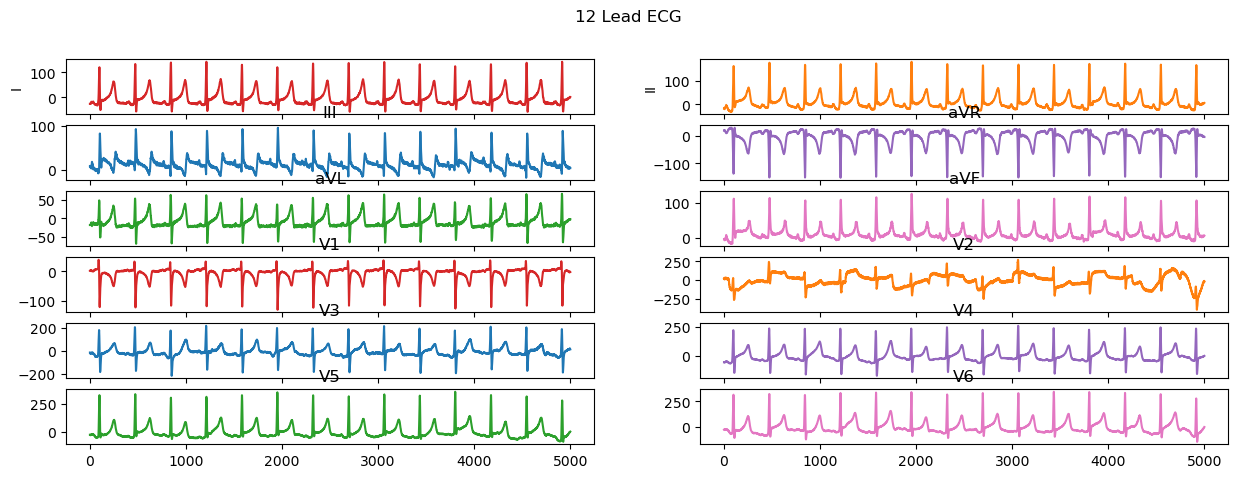

In [2]:
import sqlite3
import LabelInfo as li
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

try:
    # Loading the dataset
    data = pd.read_csv("D:/apps/PyECG/allleads.csv")      #.iloc[[0,100],[]]

    # X axis 
    ts = data['TS'] 

    plt.rcParams['figure.figsize'] = [15, 5]
    fig, axs = plt.subplots(6,2)
    fig.suptitle('12 Lead ECG')

    # Connect to DB and create a cursor
    sqliteConnection = sqlite3.connect('ecgxml.db')
    cursor = sqliteConnection.cursor()
    print('DB Init')
 
    # Write a query and execute it with cursor
    #query = 'select sqlite_version();'
    query = 'SELECT Id, Fullpath, LabelList, Blob FROM Labels WHERE Id = 41;'
    cursor.execute(query)
 
    # Fetch and output result
    result = cursor.fetchall()
 
    for row in result:
        (Id, Fullpath, LabelList, Blob) = row
        print(Id)
        print(Fullpath)

        print(LabelList)
        if (LabelList != 'NA'):
            labels = li.deserialize_from_json(LabelList)
            for label in labels:
                print(label)

        int16_array = np.frombuffer(Blob, dtype=np.int16)
        reshaped = int16_array.reshape((12, 5000))

        # print(reshaped_array)

        axs[0, 0].plot(ts, reshaped[0], 'tab:red')
        axs[0, 0].set(ylabel='I')

        axs[0, 1].plot(ts, reshaped[1], 'tab:orange')
        axs[0, 1].set(ylabel='II')

        axs[1, 0].plot(ts, reshaped[2], 'tab:blue')
        axs[1, 0].set_title('III')

        axs[1, 1].plot(ts, reshaped[3], 'tab:purple')
        axs[1, 1].set_title('aVR')

        axs[2, 0].plot(ts, reshaped[4], 'tab:green')
        axs[2, 0].set_title('aVL')

        axs[2, 1].plot(ts, reshaped[5], 'tab:pink')
        axs[2, 1].set_title('aVF')

        axs[3, 0].plot(ts, reshaped[6], 'tab:red')
        axs[3, 0].set_title('V1')

        axs[3, 1].plot(ts, reshaped[7], 'tab:orange')
        axs[3, 1].set_title('V2')

        axs[4, 0].plot(ts, reshaped[8], 'tab:blue')
        axs[4, 0].set_title('V3')

        axs[4, 1].plot(ts, reshaped[9], 'tab:purple')
        axs[4, 1].set_title('V4')

        axs[5, 0].plot(ts, reshaped[10], 'tab:green')
        axs[5, 0].set_title('V5')

        axs[5, 1].plot(ts, reshaped[11], 'tab:pink')
        axs[5, 1].set_title('V6')
        
    # Close the cursor
    cursor.close()
 
# Handle errors
except sqlite3.Error as error:
    print('Error occurred - ', error)
 
# Close DB Connection irrespective of success
# or failure
finally:
   
    if sqliteConnection:
        sqliteConnection.close()
        print('SQLite Connection closed')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt, iirnotch

# 生成随机信号（模拟ECG信号）
sample_rate = 500  # 采样频率
num_samples = 5000  # 样本数量
t = np.linspace(0, num_samples / sample_rate, num_samples, endpoint=False)
input_signal = np.sin(2 * np.pi * 5 * t) + 0.5 * np.sin(2 * np.pi * 50 * t)  # 5 Hz信号 + 50 Hz噪声

# 低通滤波器
def lowpass_filter(signal, sample_rate, cutoff_freq, order=4):
    b, a = butter(order, cutoff_freq / (sample_rate / 2), btype='low')
    return filtfilt(b, a, signal)

# 高通滤波器
def highpass_filter(signal, sample_rate, cutoff_freq, order=4):
    b, a = butter(order, cutoff_freq / (sample_rate / 2), btype='high')
    return filtfilt(b, a, signal)

# 带通滤波器
def bandpass_filter(signal, sample_rate, low_cutoff, high_cutoff, order=4):
    b, a = butter(order, [low_cutoff / (sample_rate / 2), high_cutoff / (sample_rate / 2)], btype='band')
    return filtfilt(b, a, signal)

# 陷波滤波器
def notch_filter(signal, sample_rate, notch_freq, quality_factor=30):
    b, a = iirnotch(notch_freq, quality_factor, sample_rate)
    return filtfilt(b, a, signal)

# 应用滤波器
filtered_lowpass = lowpass_filter(input_signal, sample_rate, cutoff_freq=40)
filtered_highpass = highpass_filter(input_signal, sample_rate, cutoff_freq=0.5)
filtered_bandpass = bandpass_filter(input_signal, sample_rate, low_cutoff=0.5, high_cutoff=40)
filtered_notch = notch_filter(input_signal, sample_rate, notch_freq=50)

# 绘制结果
plt.figure(figsize=(12, 8))
plt.subplot(5, 1, 1)
plt.plot(t, input_signal)
plt.title("原始信号")

plt.subplot(5, 1, 2)
plt.plot(t, filtered_lowpass)
plt.title("低通滤波后")

plt.subplot(5, 1, 3)
plt.plot(t, filtered_highpass)
plt.title("高通滤波后")

plt.subplot(5, 1, 4)
plt.plot(t, filtered_bandpass)
plt.title("带通滤波后")

plt.subplot(5, 1, 5)
plt.plot(t, filtered_notch)
plt.title("陷波滤波后")

plt.tight_layout()
plt.show()